# Attempt to Normalize Occurence Data!
We began by finding the best other column to normalize the data on in our case that was 'recordedby' column. With te occurence data normlaized we tried a least means squares regression to provide us with statistics to confirm or bust the idea that temperture has a orrelation to mushroom occurence.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
#imports the fungi_data
fungi_data = pd.read_csv("march_6_fungi_data.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode',  'eventDate', 'taxonKey','speciesKey',
                               'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')
year_num = 2018
data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'recordedBy' ]
print(data_rh.nunique(dropna=True))




351


/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,33,36,40,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
fungi_clean.head(5)

,family,genus,scientificName,locality,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,month,year,rightsHolder,recordedBy
39768,Cantharellaceae,Cantharellus,Cantharellus cinereus (Pers.) Fr.,No locality information available,883ee5d0-9177-423d-a636-0284e8a4de46,56.08603,14.35018,NaN,10.0,1950,NaN,Olof Andersson
39591,Botryobasidiaceae,Botryobasidium,Botryobasidium subcoronatum (Höhn. & Litsch.) ...,"S om Muddus nationalpark, nära Njuoravuolle-st...",4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,6.0,1950,NaN,Berit Eriksson & John Eriksson
39590,Botryobasidiaceae,Botryobasidium,Botryobasidium subcoronatum (Höhn. & Litsch.) ...,"S om Muddus nationalpark, nära Njuoravuolle-st...",4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,6.0,1950,NaN,Berit Eriksson & John Eriksson
39589,Botryobasidiaceae,Botryobasidium,Botryobasidium subcoronatum (Höhn. & Litsch.) ...,"S om Muddus nationalpark, nära Njuoravuolle-st...",4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,6.0,1950,NaN,Berit Eriksson & John Eriksson
39588,Botryobasidiaceae,Botryobasidium,Botryobasidium subcoronatum (Höhn. & Litsch.) ...,"S om Muddus nationalpark, nära Njuoravuolle-st...",4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,6.0,1950,NaN,Berit Eriksson & John Eriksson


In [8]:
def DataCall(year_num):
    data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'recordedBy' ]
    return data_rh.nunique(dropna=True)

#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
# def DataCall(year_num):
#     data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'rightsHolder']
#     return data_rh.nunique(dropna=True)

In [9]:
#totals the number of Recorded by per year.
total_month = np.zeros(69)
years = np.arange(1950,2019,1)
totaler = []
for i in years:
    temp = DataCall(i)
    totaler = np.append(totaler, temp)
print(totaler)

[ 14.  23.   9.  18.  14.   4.  11.  13.  11.   9.  25.  11.  10.  10.
   9.  20.  16.  18.  13.   9.  44.  20.  26.  25.  39.  21.  17.  45.
  32.  45.  42.  33.  29.  25.  61.  46.  35.  31.  59.  33.  54.  48.
  59.  92.  74.  77.  75.  95. 119.  69. 115. 123.  90.  99. 116. 117.
 139. 136. 180. 169. 238. 289. 189. 198. 318. 333. 362. 610. 351.]


<function matplotlib.pyplot.show(*args, **kw)>

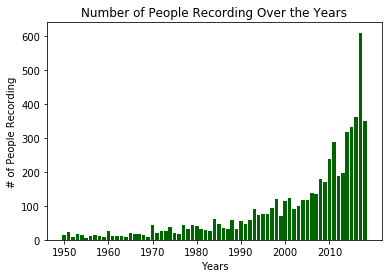

In [24]:
#Plots the total number of people recording data by years
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = "Number of People Recording Over the Years", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "# of People Recording",
       xlabel = "Years")
ax.bar(years, totaler, width = .8, color= 'darkgreen')
plt.savefig("people_recording.png", dpi=300)
plt.show

### Normalized Data

In [11]:
# normalizes the data from the year (input) and outputs what percent of observation occured in each of the months
def DataCall2(year_range):
    
    mushrooms = []
    
    for i in year_range:
        data_year = fungi_clean.loc[fungi_clean['year'] == i]
        mushrooms = np.append(mushrooms,data_year.shape[0]) 
        
       
    return mushrooms

In [12]:
# Create random data with numpy
import numpy as np

years = np.arange(1950,2019,1)
annual_occurances = DataCall2(years)
    
totaler_3_the_reckoning = annual_occurances/totaler

In [13]:
# removing the NaNs with 0's
totaler_3_the_reckoning[9] = 0
totaler_3_the_reckoning[19] = 0

<function matplotlib.pyplot.show(*args, **kw)>

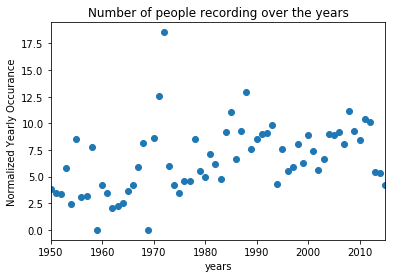

In [14]:
#plots normalized occurence by those recorded by
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set(title = "Number of people recording over the years", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "Normalized Yearly Occurance",
       xlabel = "years",
       xlim = [1950,2015])
ax.scatter(years, totaler_3_the_reckoning,)
# plt.savefig("peak_occurence_3_14.png", dpi=300)
plt.show



### Normalized occurences correlated to Temperture

In [15]:
Column1 = years
Column2= np.ones(len(Column1))
A = np.column_stack((Column1, Column2))
columnC = np.array(totaler_3_the_reckoning)
C = np.transpose(columnC)

ps = np.linalg.lstsq(A, C, rcond=None)[0]
p1 = ps[0]
p2 = ps[1]

# Create predicted y values for a range of x values
xhat = years
yhat = p1*xhat + p2

In [16]:
def squared_error(regression_line, data):
    return sum((regression_line - data)*(regression_line - data))

def r_squared(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

My r^2 value is: 0.10978940838577855


<function matplotlib.pyplot.show(*args, **kw)>

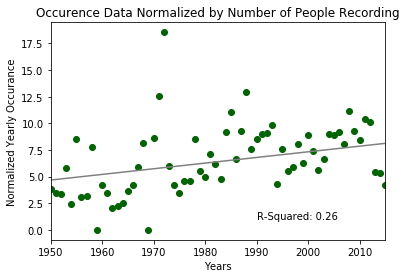

In [26]:

print("My r^2 value is:", r_squared(totaler_3_the_reckoning,yhat))
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set(title = "Occurence Data Normalized by Number of People Recording", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "Normalized Yearly Occurance",
       xlabel = "Years",
       xlim = [1950,2015])
ax.text(1990, 1, "R-Squared: 0.26")
ax.scatter(years, totaler_3_the_reckoning, color = 'darkgreen')


ax.plot(xhat, yhat, color="grey")
plt.savefig("normalized occurence.png", dpi=300)
plt.show

